In [19]:
%reset -f


In [20]:
import wbdata
import pandas as pd
import datetime

In [21]:
countries = ['PK', 'IN', 'BD']


In [35]:
indicators = {
    # Original mappings
    'NY.GDP.PCAP.KD': 'gdp_per_capita',
    'SP.URB.TOTL.IN.ZS': 'urbanization_rate',
    'NV.IND.TOTL.ZS': 'industry_share',
    'NV.AGR.TOTL.ZS': 'agriculture_share',
    'SE.SEC.ENRR': 'secondary_enrollment',
    'SE.TER.ENRR': 'tertiary_enrollment',
    'SP.POP.GROW': 'population_growth',
    'SP.POP.DPND.YG': 'youth_dependency_ratio',
    'IT.NET.USER.ZS': 'internet_penetration',
    'EG.ELC.ACCS.ZS': 'electricity_access',
    'FP.CPI.TOTL.ZG': 'inflation_rate',
    'NE.TRD.GNFS.ZS': 'trade_percent_gdp',
    'BX.KLT.DINV.WD.GD.ZS': 'fdi_inflow',
    'FS.AST.PRVT.GD.ZS': 'credit_to_private_sector',
    'BX.TRF.PWKR.DT.GD.ZS': 'remittances_percent_gdp',
    'NE.CON.GOVT.ZS': 'govt_consumption_percent_gdp',
    'NY.GNS.ICTR.ZS': 'gross_savings_percent_gdp',

    # Socio-Demographics & Human Capital
    'NV.SRV.TOTL.ZS': 'services_share',  # Services value added (% of GDP)
    'SE.ADT.LITR.ZS': 'adult_literacy_rate',  # Literacy rate, adult total (% ages 15+)
    'SP.DYN.LE00.IN': 'life_expectancy_at_birth',  # Life expectancy at birth, total (years)
    'SP.DYN.TFRT.IN': 'fertility_rate',  # Total fertility rate (births per woman)
    'SE.PRM.ENRR': 'primary_gross_enrollment_rate',  # School enrollment, primary (% gross)
    'SE.SEC.ENRR': 'secondary_gross_enrollment_rate',  # (already mapped)
    'SE.TER.ENRR': 'tertiary_gross_enrollment_rate',  # (already mapped)

    # Population & Age Composition
    'SP.POP.DPND': 'age_dependency_ratio',  # Age dependency ratio (% of working-age population)
    'SP.POP.DPND.OL': 'old_age_dependency_ratio',  # Age dependency ratio, old (% of working-age population)

    # Infrastructure & Technology
    'IT.NET.BBND.P2': 'fixed_broadband_subscriptions_per_100',  # Fixed broadband subscriptions (per 100 people)
    'IT.CEL.SETS.P2': 'mobile_cellular_subscriptions_per_100',  # Mobile cellular subscriptions (per 100 people)

    # Macroeconomic & Financial
    'FR.INR.RINR': 'real_interest_rate',  # Real interest rate (%)
    'TX.QTY.MRCH.XD.WD': 'export_volume_index',  # Export volume index (2015 = 100)
    'DT.DOD.DECT.GN.ZS': 'external_debt_percent_gni',  # External debt stocks (% of GNI)
    'SE.XPD.TOTL.GD.ZS': 'govt_expenditure_on_education_percent_gdp',  # Government expenditure on education, total (% of GDP)
    'GC.TAX.TOTL.GD.ZS': 'tax_revenue_percent_gdp',  # Tax revenue (% of GDP)
    'GC.NLD.TOTL.GD.ZS': 'fiscal_balance_percent_gdp',  # Net lending (+) / net borrowing (–) (% of GDP)
    'FM.LBL.BMNY.GD.ZS': 'broad_money_percent_gdp',  # Broad money (% of GDP)
    'NE.GDI.TOTL.ZS': 'gross_capital_formation_percent_gdp',  # Gross capital formation (% of GDP)


    # Energy & Environment
    'EG.USE.ELEC.KH.PC': 'electricity_consumption_kwh_per_capita',  # Electric power consumption (kWh per capita)
    'EG.FEC.RNEW.ZS': 'renewable_energy_consumption_percent',  # Renewable energy consumption (% of total final energy consumption)
    'EG.USE.COMM.FO.ZS': 'fossil_fuel_energy_consumption_percent',  # Fossil fuel energy consumption (% of total)

    # Tourism & Services Trade
    'ST.INT.RCPT.CD': 'international_tourism_receipts_usd',  # International tourism, receipts (current US$)
    'ST.INT.RCPT.XP.ZS': 'international_tourism_receipts_percent',  # International tourism receipts (% of total exports of goods and services)
    'BG.GSR.NFSV.GD.ZS': 'trade_in_services_percent_gdp',  # Trade in services (% of GDP)
}


In [36]:

# ---- TEST EACH INDICATOR ----
missing_indicators = []
available_indicators = []
for name, code in indicators.items():
    try:
        df = wbdata.get_dataframe({name: code}, country=countries)
        if df.empty:
            missing_indicators.append((name, code))
        else:
            available_indicators.append((name, code))
    except Exception as e:
        # If any error occurs (including NoneType), mark as missing
        missing_indicators.append((name, code))

# ---- PRINT RESULTS ----
if available_indicators:
    print("\n✅ These indicators returned data:", [name for name, _ in available_indicators])
if missing_indicators:
    print("\n❌ These indicators have no available data or failed:", [name for name, _ in missing_indicators])



✅ These indicators returned data: ['NY.GDP.PCAP.KD', 'SP.URB.TOTL.IN.ZS', 'NV.IND.TOTL.ZS', 'NV.AGR.TOTL.ZS', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.GROW', 'SP.POP.DPND.YG', 'IT.NET.USER.ZS', 'EG.ELC.ACCS.ZS', 'FP.CPI.TOTL.ZG', 'NE.TRD.GNFS.ZS', 'BX.KLT.DINV.WD.GD.ZS', 'FS.AST.PRVT.GD.ZS', 'BX.TRF.PWKR.DT.GD.ZS', 'NE.CON.GOVT.ZS', 'NY.GNS.ICTR.ZS', 'NV.SRV.TOTL.ZS', 'SE.ADT.LITR.ZS', 'SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'SE.PRM.ENRR', 'SP.POP.DPND', 'SP.POP.DPND.OL', 'IT.NET.BBND.P2', 'IT.CEL.SETS.P2', 'FR.INR.RINR', 'TX.QTY.MRCH.XD.WD', 'DT.DOD.DECT.GN.ZS', 'SE.XPD.TOTL.GD.ZS', 'GC.TAX.TOTL.GD.ZS', 'GC.NLD.TOTL.GD.ZS', 'FM.LBL.BMNY.GD.ZS', 'NE.GDI.TOTL.ZS', 'EG.USE.ELEC.KH.PC', 'EG.FEC.RNEW.ZS', 'EG.USE.COMM.FO.ZS', 'ST.INT.RCPT.CD', 'ST.INT.RCPT.XP.ZS', 'BG.GSR.NFSV.GD.ZS']


In [59]:
df=wbdata.get_dataframe(indicators, country=countries)


In [60]:
df = df.reset_index()
df['year'] = pd.to_datetime(df['date']).dt.year
df = df.drop(columns=['date'])


In [61]:
df = df[(df['year'] >= 1970) & (df['year'] <= 2022)]


In [62]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print(missing_data)


adult_literacy_rate                          123
fixed_broadband_subscriptions_per_100        103
international_tourism_receipts_percent        99
international_tourism_receipts_usd            99
fiscal_balance_percent_gdp                    88
internet_penetration                          73
tax_revenue_percent_gdp                       72
electricity_access                            72
renewable_energy_consumption_percent          63
fossil_fuel_energy_consumption_percent        60
electricity_consumption_kwh_per_capita        60
govt_expenditure_on_education_percent_gdp     54
real_interest_rate                            49
tertiary_gross_enrollment_rate                39
primary_gross_enrollment_rate                 36
secondary_gross_enrollment_rate               35
export_volume_index                           33
gross_savings_percent_gdp                     17
remittances_percent_gdp                       17
trade_in_services_percent_gdp                 17
inflation_rate      

In [63]:
# Count non-null values for each variable by year and country
coverage = df.groupby(['country', 'year']).count()

# Check how many indicators are available for each year/country combo
coverage['available_vars'] = coverage.sum(axis=1)

# Reset index so we can view it as a table
coverage = coverage.reset_index()

# See the worst and best coverage examples
coverage.sort_values(by='available_vars', ascending=True).head(10)


country  year  gdp_per_capita  urbanization_rate  industry_share  \
1    Bangladesh  1971               1                  1               1   
2    Bangladesh  1972               1                  1               1   
0    Bangladesh  1970               1                  1               1   
3    Bangladesh  1973               1                  1               1   
53        India  1970               1                  1               1   
106    Pakistan  1970               1                  1               1   
5    Bangladesh  1975               1                  1               1   
4    Bangladesh  1974               1                  1               1   
55        India  1972               1                  1               1   
54        India  1971               1                  1               1   

     agriculture_share  secondary_gross_enrollment_rate  \
1                    1                                0   
2                    1                                0   
0                    1                                0   
3                    1                                1   
53                   1                                0   
106                  1                                0   
5                    1                                0   
4                    1                                0   
55                   1                                1   
54                   1                                1   

     tertiary_gross_enrollment_rate  population_growth  \
1                                 0                  1   
2                                 1                  1   
0                                 1                  1   
3                                 1                  1   
53                                0                  1   
106                               0                  1   
5                                 0                  1   
4                                 1                  1   
55                                0                  1   
54                                1                  1   

     youth_dependency_ratio  ...  fiscal_balance_percent_gdp  \
1                         1  ...                           0   
2                         1  ...                           0   
0                         1  ...                           0   
3                         1  ...                           0   
53                        1  ...                           0   
106                       1  ...                           0   
5                         1  ...                           0   
4                         1  ...                           0   
55                        1  ...                           0   
54                        1  ...                           0   

     broad_money_percent_gdp  gross_capital_formation_percent_gdp  \
1                          0                                    1   
2                          0                                    1   
0                          0                                    1   
3                          0                                    1   
53                         1                                    1   
106                        1                                    1   
5                          1                                    1   
4                          1                                    1   
55                         1                                    1   
54                         1                                    1   

     electricity_consumption_kwh_per_capita  \
1                                         0   
2                                         0   
0                                         0   
3                                         0   
53                                        0   
106                                       0   
5                                         0   
4                                        

In [64]:
# Count how many country-year rows have enough data (e.g., ≥13 indicators present)
good_rows = coverage[coverage['available_vars'] >= 13]
print(f"Number of good rows: {len(good_rows)} out of {len(coverage)} total rows")


Number of good rows: 159 out of 159 total rows


In [65]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]
missing_percent


adult_literacy_rate                          77.358491
fixed_broadband_subscriptions_per_100        64.779874
international_tourism_receipts_percent       62.264151
international_tourism_receipts_usd           62.264151
fiscal_balance_percent_gdp                   55.345912
internet_penetration                         45.911950
tax_revenue_percent_gdp                      45.283019
electricity_access                           45.283019
renewable_energy_consumption_percent         39.622642
fossil_fuel_energy_consumption_percent       37.735849
electricity_consumption_kwh_per_capita       37.735849
govt_expenditure_on_education_percent_gdp    33.962264
real_interest_rate                           30.817610
tertiary_gross_enrollment_rate               24.528302
primary_gross_enrollment_rate                22.641509
secondary_gross_enrollment_rate              22.012579
export_volume_index                          20.754717
gross_savings_percent_gdp                    10.691824
remittance

In [66]:
# Create a copy of the original dataframe to preserve it
df_imputed = df.copy()

# Impute missing values with the mean of each variable within each country
df_imputed.update(df.groupby('country').transform(lambda x: x.fillna(x.mean())))


In [67]:
# Check remaining missing values after imputation
missing_after = df_imputed.isnull().sum().sort_values(ascending=False)
missing_after[missing_after > 0]


Series([], dtype: int64)

In [68]:
# Save the cleaned DataFrame to a CSV file
df_imputed.to_csv("cleaned_gdp_structural_data.csv", index=False)


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")


In [70]:
!pip install seaborn


In [71]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [72]:
import seaborn as sns
sns.set(style="whitegrid")


In [73]:
sns.set(style="white")  # or "ticks"


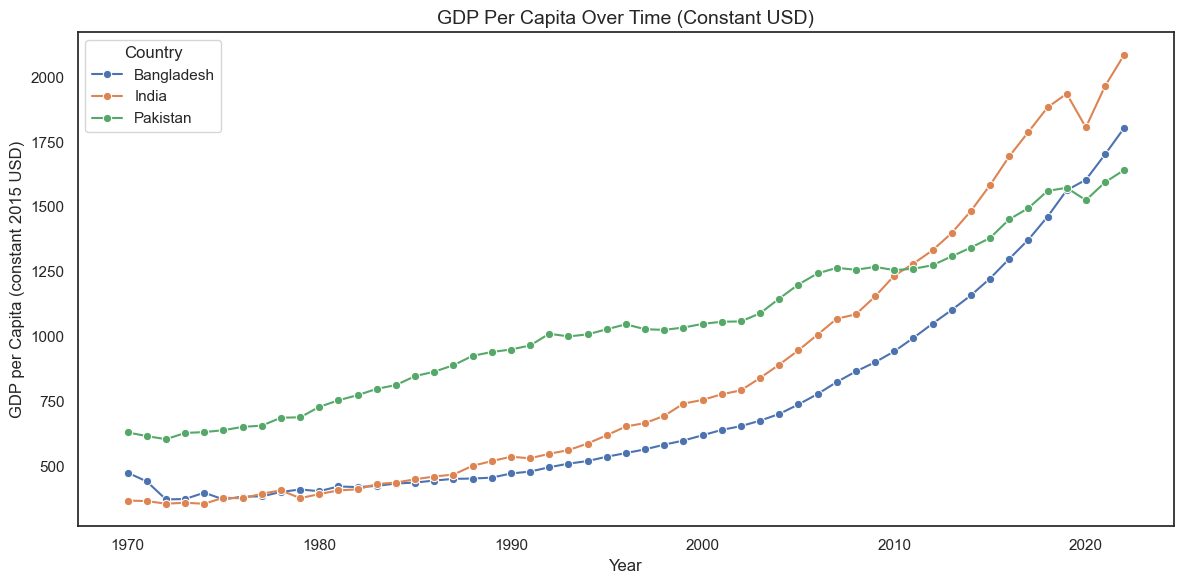

In [74]:
# Set figure size
plt.figure(figsize=(12, 6))

# Lineplot of GDP per capita over time
sns.lineplot(data=df_imputed, x="year", y="gdp_per_capita", hue="country", marker="o")

# Titles and labels
plt.title("GDP Per Capita Over Time (Constant USD)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP per Capita (constant 2015 USD)")
plt.legend(title="Country")
plt.tight_layout()

# Show the plot
plt.show()



In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set your preferred Seaborn style for publishing
sns.set(style="white")


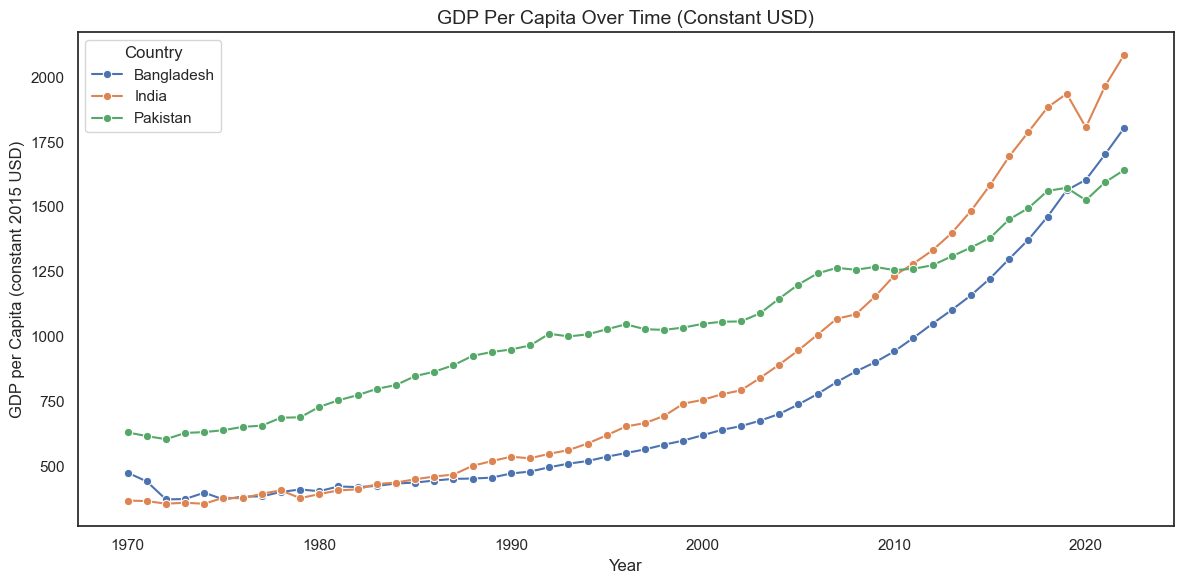

In [76]:
# Set figure size
plt.figure(figsize=(12, 6))

# Lineplot of GDP per capita over time
sns.lineplot(data=df_imputed, x="year", y="gdp_per_capita", hue="country", marker="o")

# Titles and labels
plt.title("GDP Per Capita Over Time (Constant USD)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP per Capita (constant 2015 USD)")
plt.legend(title="Country")
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
df_imputed = df.copy()


In [78]:
import wbdata
import pandas as pd
from datetime import datetime

# Define countries and date range
countries = ["PAK", "IND", "BGD"]
start_date = datetime(1970, 1, 1)
end_date = datetime(2022, 1, 1)

# Download data
df = wbdata.get_dataframe(indicators, country=countries)

# Reset index for easier handling
df = df.reset_index()

# Filter relevant years
df = df[(df['date'] >= 1970) & (df['date'] <= 2022)]
df.rename(columns={'date': 'year'}, inplace=True)


TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
df_imputed = df.copy()


In [79]:
df.describe()

gdp_per_capita  urbanization_rate  industry_share  agriculture_share  \
count      192.000000         192.000000      192.000000         192.000000   
mean       819.733907          25.677964       21.991022          28.939142   
std        448.511738           8.372805        5.568340          11.774570   
min        312.777848           5.135000        6.064102          11.003690   
25%        449.745091          20.984750       19.939069          21.350350   
50%        655.014034          26.503000       21.706546          25.538130   
75%       1073.561739          32.156000       26.187064          34.283481   
max       2236.312793          40.473000       34.594272          61.954139   

       secondary_gross_enrollment_rate  tertiary_gross_enrollment_rate  \
count                       126.000000                      123.000000   
mean                         39.901525                        9.755920   
std                          19.834041                        8.242411   
min                          15.092020                        1.847020   
25%                          20.516577                        4.352335   
50%                          36.693928                        6.090470   
75%                          51.802981                       12.371085   
max                          81.177861                       33.116524   

       population_growth  youth_dependency_ratio  internet_penetration  \
count         189.000000              192.000000             88.000000   
mean            2.158207               69.873884              9.582741   
std             0.728481               13.439063             12.166471   
min             0.790201               36.837194              0.000000   
25%             1.631421               61.778779              0.190250   
50%             2.250363               73.147691              5.080000   
75%             2.735875               81.809125             13.575000   
max             4.178102               86.736557             55.900000   

       electricity_access  ...  tax_revenue_percent_gdp  \
count           90.000000  ...                87.000000   
mean            69.303423  ...                 9.758519   
std             24.171994  ...                 1.930653   
min              9.905419  ...                 6.611160   
25%             54.771148  ...                 8.516791   
50%             74.500000  ...                 9.306540   
75%             89.525000  ...                11.011738   
max             99.600000  ...                13.708046   

       fiscal_balance_percent_gdp  broad_money_percent_gdp  \
count                   71.000000               176.000000   
mean                    -2.355505                42.435781   
std                      1.642954                16.792807   
min                     -6.733278                 8.353728   
25%                     -3.344613                29.348882   
50%                     -2.403924                42.986163   
75%                     -0.868497                50.869464   
max                      0.184574                87.676673   

       gross_capital_formation_percent_gdp  \
count                           192.000000   
mean                             20.960699   
std                               7.478762   
min                               4.697696   
25%                              15.955101   
50%                              18.903946   
75%                              26.152734   
max                              41.950798   

       electricity_consumption_kwh_per_capita  \
count                               99.000000   
mean                               399.972657   
std                                229.372397   
min                                 46.007605   
25%                                275.453091   
50%                                379.597777   
75%                                495.266378   
max                               1074.843588   

       renewa